In [1]:
#Please Run all cells in order and one by one to use each interactive plot separately.

In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
#code in this cell is from https://mljar.com/blog/jupyter-notebook-hide-code/

# 4.1 Introduction to Wave Packets.

This notebook's purpose is to visualize, exemplify and expand the results of exercise $4.1$:

4.1 - Let us assume that a free particle with mass m can be described at t = 0 by the following wave packet:

$$\begin{align}
    \Psi(x) = N \int_{-\infty}^{\infty} \exp\left(ikx-\frac{a^2k^2}{2}\right)\sin(ak) \; \frac{dk}{2\pi} ,
\end{align}$$

where N is a normalizing constant.

a) Determine which values for k cannot be obtained after measuring the momentum of the particle.  
b) Deduce an equation for obtaining the most probable value of k.  
c) Write down $\Psi(x,t)$.

## 2D representation of $|\tilde{\Psi}(k,t)|^2$
First of all, we can analyze a figure of the wavefunction in the k space at t = 0 to indentify the $k$ values in which $|\tilde{\Psi}(k,t=0)|^2=0$ and the $k$  values where $|\tilde{\Psi}|^2$ is maximum. Note that the amplitude of the function will decay exponentially and oscillate, so there are infinite periodic minimums and maximums. Also note that the eigenstates of the momentum are also eigenstates of the energy since this wave function describes a free particle.     
Therefore, $|\tilde{\Psi}(k,t)|^2$ = $|\tilde{\Psi}(k,0)|^2$

<IPython.core.display.Javascript object>


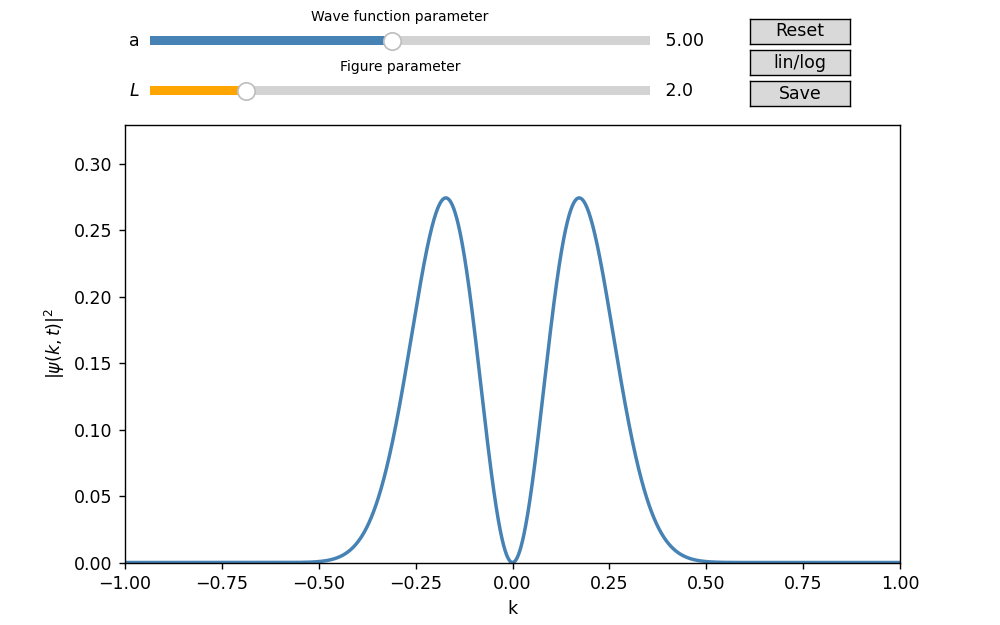

In [2]:
import cmath as cm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from numpy import sin, exp

#We activate the interactive mode in order to display animations
%matplotlib notebook

#We define the time dependent wave function
#Please note that time is preset to zero as it won't be used in this part of the program
def PsiK(K,t):
#   We will represent the function with N = 1
    Psi1 = exp(-a**2*K**2/2-I*K**2*t/2)*sin(a*K)
    return Psi1

#Program constants
pi = cm.pi
I = complex(0,1)

# -----------------------------------------------------------------------------------------------

def find_lims(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of Y
    ymax = np.max(Y)
    ymin = np.min(Y)
    
    if(ymax >= 0 and ymin >= 0):
        lim_inf, lim_sup = ymin*0.8, ymax*1.2
    elif(ymax > 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*1.2
    elif(ymax < 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*0.8
    
    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def interactive_rho_k(Psi):
# Input: Psi(K,t=0), wave function we want to represent (function of the array K, time is ignored as we want to represent the case t = 0).
#                    this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------
    
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_a = fig.add_axes([0.15, 0.92, 0.5, 0.03])
        ax_a.set_title('Wave function parameter',fontsize=8)

        ax_L = fig.add_axes([0.15, 0.84, 0.5, 0.03])
        ax_L.set_title('Figure parameter',fontsize=8)

        #We create the sliders as widgets
        s_a = Slider(ax=ax_a, label='a', valmin=0.3, valmax=10, valinit=a, valfmt=' %1.2f ', facecolor='steelblue')
        s_L = Slider(ax=ax_L, label='$L$', valmin=0.1, valmax=10, valinit=L, valfmt=' %1.1f ', facecolor='orange')    

        #We return all axes and sliders created in the function
        return ax_a, ax_L, s_a, s_L
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.75,0.930,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')

        def reset(event):
        #Resets all sliders
            s_a.reset()
            s_L.reset()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)

        
        #We create an axis for the reset button and define its widget
        ax_scale = fig.add_axes([0.75,0.880,0.1,0.04])
        b_scale = Button(ax_scale, 'lin/log', hovercolor='0.975')

        def change_scale(event):
            global logscale
            if (logscale == False):
                ax.set_yscale('log')
                logscale = True
            elif (logscale == True):
                ax.set_yscale('linear')
                logscale = False
            return
        #We call the change_scale function when the scale button is used
        global logscale
        logscale = False
        b_scale.on_clicked(change_scale)
        
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.75,0.830,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')
        
        def save_fig(event):
        #Saves the actual figure
            plt.savefig('Wave_Packet_rhok.png')
            return
        #We call the save function when the reset button is used
        b_save.on_clicked(save_fig)
        
        #We return the two buttons
        return b_reset, b_scale, b_save
    
    
    def initialize_main_plot():
    #This function is used to initialize the main plot axis, and the details of this initialization must be changed here
        #We compute the needed variables to initialize
        K = np.linspace(k0,kf,4000)
        rho_k = np.abs(Psi(K,t))**2 #Note that this variable is not exactly the probability density, as Psi is not normalized

        #We plot the preset distribution
        line, = ax.plot(K,rho_k,lw=2,color='steelblue')
        line.set_data(K,rho_k)

        #We add axis labels and limits to the initial figure
        ax.set_xlim(k0,kf)   
        ymin, ymax = find_lims(rho_k)
        ax.set_ylim(ymin,ymax)
        ax.set_xlabel('k')
        ax.set_ylabel('$|ψ(k,t)|^2$')
        
        #We avoid too many ticks at the axes
        plt.locator_params(nbins=4)
        
        return ax, line
    
    def actualize_main_plot():
    #This function is used to initialize the main plot axis, and the details of this initialization must be changed here
        #We calculate the new data and actualize the represented line
        K = np.linspace(k0,kf,4000)
        rho_k = np.abs(Psi(K,t))**2
        line.set_data(K,rho_k)
        
        #We compute and apply the new limits in the main figure
        ymin, ymax = find_lims(rho_k)
        ax.set_xlim(k0,kf)
        ax.set_ylim(ymin,ymax)
        return ax, line
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global a,k0,kf
        a = s_a.val
        L = s_L.val
        k0 = -L
        kf = L
        
        #We actualize the main plot
        ax, line = actualize_main_plot()

        plt.show()
        return
    
        # ------------------------------------------------------------
  
    #Function's Main Program
    #We choose the preset wave function and figure parameters
    global L, k0, kf, a
    a = 5
    L = 2
    
    k0 = -L/2 
    kf = L/2
    t = 0
    
    #We define figure's axes
    fig, ax = plt.subplots(figsize=(8,5))
    fig.subplots_adjust(bottom = 0.1, top = 0.80)
    
    #We create the desired sliders
    ax_a, ax_L, s_a, s_L = create_sliders()
    
    #We initialize the main plot (its initial representation and graphic details)
    ax, line = initialize_main_plot()
    
    #We call the update function when any slider is used
    s_a.on_changed(update)
    s_L.on_changed(update)
    
    b_reset, b_scale, b_save = generate_buttons()
    
    plt.show()
    #Although it might seem redundant to return the figure and buttons after showing them, referencing them 
    # in the main program is needed for the interactive plot to work properly
    return fig, b_reset, b_scale, b_save

# -----------------------------------------------------------------------------------------------

fig, b_reset, b_scale, b_save = interactive_rho_k(PsiK)

Note that this wave function describes a free particle, and therefore $E = \frac{p^2}{2m} = \frac{ħ^2k^2}{2m}$

We can calculate the position-space wave function solving the presented Fourier transform:

$$
\Psi(x,t) = N \int_{-\infty}^{\infty} \sin(ak)\exp\left(ikx-\frac{a^2k^2}{2} -i \frac{ħk^2}{2m}t \right) \; \frac{dk}{2\pi}
$$

The proposed integral can be solved using the sine function complex definition, and its result is:

$$
\Psi(x,t) = \frac{N}{2i}\frac{1}{ \sqrt{a^2+i\frac{ħt}{m}} } \left[ \exp{\left(-\frac{1}{2}\frac{(x+a)^2}{a^2+i\frac{ħt}{m}}\right)} - \exp{\left(-\frac{1}{2}\frac{(x-a)^2}{a^2+i\frac{ħt}{m}}\right)} \right]
$$

## 2D representation of $|ψ(x,t)|^2$

<IPython.core.display.Javascript object>


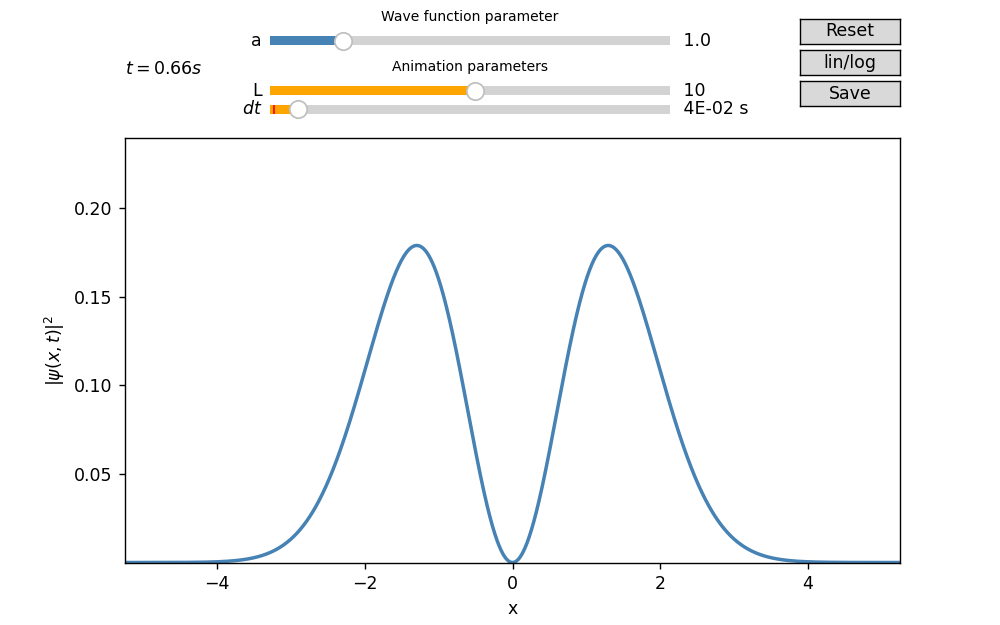

In [3]:
import numpy as np
from numpy import pi, exp, sqrt
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We activate the interactive mode in order to display animations
%matplotlib notebook

#We define the time dependent wave function
def Psi1(X,t): 
    N = sqrt(2*a/(pi*(1-1/exp(1))))
    Psi1 = N/(2*I*sqrt(a**2+I*t))*( exp(-1/2*(X+a)**2/(a**2+I*t)) - exp(-1/2*(X-a)**2/(a**2+I*t)) )
    return Psi1

#Program constants
I = complex(0,1)


# -----------------------------------------------------------------------------------------------

def find_lims(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of Y
    ymax = np.max(Y)
    ymin = np.min(Y)
    
    if(ymax >= 0 and ymin >= 0):
        lim_inf, lim_sup = ymin*0.8, ymax*1.2
    elif(ymax > 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*1.2
    elif(ymax < 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*0.8
    
    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_rhox_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_a = fig.add_axes([0.27, 0.92, 0.4, 0.03])
        ax_a.set_title('Wave function parameter',fontsize=8)

        ax_L = fig.add_axes([0.27, 0.84, 0.4, 0.03])
        ax_L.set_title('Animation parameters',fontsize=8)
        ax_dt = fig.add_axes([0.27, 0.81, 0.4, 0.03])

        #We create the sliders as widgets
        s_a = Slider(ax=ax_a, label='a', valmin=0.1, valmax=5, valinit=a, valfmt=' %1.1f ', facecolor='steelblue')
        s_L = Slider(ax=ax_L, label='L', valmin=0.5, valmax=20, valinit=L, valstep = 1, valfmt=' %0.0f',facecolor='orange')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0005,valmax=0.5,valinit=dt,valfmt=' %.E s',facecolor='orange')    
    
        #We return all axes and sliders created in the function
        return ax_L, ax_a, ax_dt, s_L, s_a, s_dt
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.80,0.930,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            s_L.reset()
            s_a.reset()
            s_dt.reset()
            t = t0
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        
        #We create an axis for the reset button and define its widget
        ax_scale = fig.add_axes([0.80,0.880,0.1,0.04])
        b_scale = Button(ax_scale, 'lin/log', hovercolor='0.975')

        def change_scale(event):
            global logscale
            if (logscale == False):
                ax.set_yscale('log')
                logscale = True
            elif (logscale == True):
                ax.set_yscale('linear')
                logscale = False
            return
        #We call the change_scale function when the scale button is used
        global logscale
        logscale = False
        b_scale.on_clicked(change_scale)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.80,0.830,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Wavepacket_animated_rhox.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_scale, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$|ψ(x,t)|^2$')
        
#       We compute the initial information
        X = np.linspace(x0,xf,2000)
        Y = Psi(X,t0)
        
#       We use the initial function limits
        ymin, ymax = find_lims(np.abs(Y)**2)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions
        line1.set_data(X, np.abs(Y)**2)
    
        #We return all line functions
        return line1
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,2000)
        Y = Psi(X,t)

#       We actualize the time annotation
        time_annotation.set_text("$t = {:10.2f} s $".format(t))

#       We represent both functions
        line1.set_data(X, np.abs(Y)**2)
        
        #We return all line functions
        return line1
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global a,x0,xf,ymin,ymax,dt
        L = s_L.val
        a = s_a.val
        dt = s_dt.val
        
        x0 = -L/2
        xf = L/2

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,2000)
        Y = Psi(X,t0)
        ymin, ymax = find_lims(np.abs(Y)**2)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global a,x0,xf,t,dt
    a = 1
    L = 10
    
    #We initialize figure's variables
    t = t0
    dt = 0.005
    x0 = -L
    xf = L
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.78)
    line1, = ax.plot([], [], lw=2, label = '$|ψ(x,t)|^2$',color='steelblue')
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_L, ax_a, ax_dt, s_L, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_scale, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation = ax.annotate("$t = {:10.2f} s $".format(t), xy=(0, 1.15), xycoords="axes fraction")
    
    #We call the update function when any slider is used
    s_L.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_scale, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_scale, b_save = animate_interactive_rhox_2D(Psi1,t0,total_frames)

## 2D representation of $ψ(x,t)$
In the following figure, the time dependent real and imaginary parts of the wave function are shown.

<IPython.core.display.Javascript object>


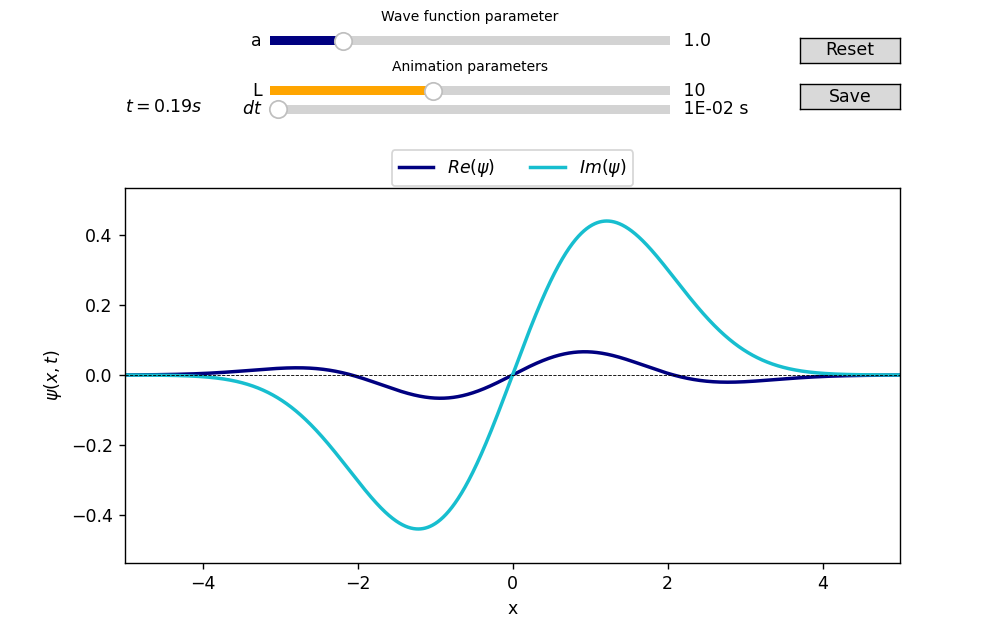

In [8]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We enable the interactive mode for the next graphic
%matplotlib notebook


# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax
    lim_inf, lim_sup = ymin*1.2, ymax*1.2

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_a = fig.add_axes([0.27, 0.92, 0.4, 0.03])
        ax_a.set_title('Wave function parameter',fontsize=8)

        ax_L = fig.add_axes([0.27, 0.84, 0.4, 0.03])
        ax_L.set_title('Animation parameters',fontsize=8)
        ax_dt = fig.add_axes([0.27, 0.81, 0.4, 0.03])

        #We create the sliders as widgets
        s_a = Slider(ax=ax_a, label='a', valmin=0.1, valmax=5, valinit=a, valfmt=' %1.1f ', facecolor='navy')
        s_L = Slider(ax=ax_L, label='L', valmin=0.5, valmax=25, valinit=L, valstep = 1, valfmt=' %0.0f',facecolor='orange')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0005,valmax=0.5,valinit=dt,valfmt=' %.E s',facecolor='orange')    
    
        #We return all axes and sliders created in the function
        return ax_L, ax_a, ax_dt, s_L, s_a, s_dt
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.900,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            s_L.reset()
            s_a.reset()
            s_dt.reset()
            t = t0
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.825,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Wavepacket_animated_Psi_2D.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$ψ(x,t)$')
        ax.legend(bbox_to_anchor=(0., 1.02, 1.,.102),loc = 'upper center',ncol=2)
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,2000)
        Y = Psi(X,t0)
        
#       We use the initial function limits
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions and a vertical line at x = a
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))  
        
        #We return all line functions
        return line1, line2
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,2000)
        Y = Psi(X,t)

#       We actualize the time annotation
        time_annotation.set_text("$t = {:10.2f} s $".format(t))

#       We represent both functions
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))       
        
        #We return all line functions
        return line1, line2
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global a,x0,xf,ymin,ymax,dt
        L = s_L.val
        a = s_a.val
        dt = s_dt.val
        
        x0 = -L
        xf = L

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,2000)
        Y = Psi(X,t0)
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)

        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global a,x0,xf,t,dt
    a = 1
    L = 10
    
    #We initialize figure's variables
    t = t0
    dt = 0.01
    x0 = -L/2
    xf = L/2
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.70)
    line1, = ax.plot([], [], lw=2, color = 'navy', label = '$Re(ψ)$')
    line2, = ax.plot([], [], lw=2, color = 'tab:cyan', label = '$Im(ψ)$')    
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_L, ax_a, ax_dt, s_L, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation = ax.annotate("$t = {:10.2f} s $".format(t), xy=(0, 1.20), xycoords="axes fraction")
    
    #We call the update function when any slider is used
    s_L.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_Psi_2D(Psi1,t0,total_frames)

## 3D representation of $ψ(x,t)$
In the following figure, the time dependent real and imaginary parts of the eigen function are shown in a 3D plot.

<IPython.core.display.Javascript object>


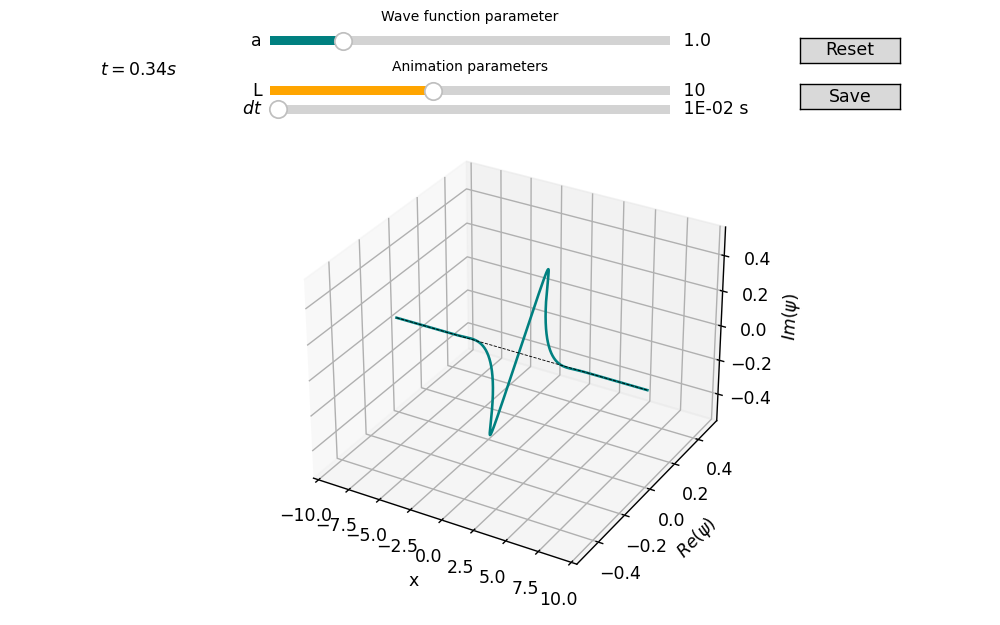

In [5]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We enable the interactive mode for the next graphic
%matplotlib notebook


# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax
    lim_inf, lim_sup = ymin*1.2, ymax*1.2

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_3D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_a = fig.add_axes([0.27, 0.92, 0.4, 0.03])
        ax_a.set_title('Wave function parameter',fontsize=8)

        ax_L = fig.add_axes([0.27, 0.84, 0.4, 0.03])
        ax_L.set_title('Animation parameters',fontsize=8)
        ax_dt = fig.add_axes([0.27, 0.81, 0.4, 0.03])

        #We create the sliders as widgets
        s_a = Slider(ax=ax_a, label='a', valmin=0.1, valmax=5, valinit=a, valfmt=' %1.1f ', facecolor='teal')
        s_L = Slider(ax=ax_L, label='L', valmin=0.5, valmax=25, valinit=L, valstep = 1, valfmt=' %0.0f',facecolor='orange')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0005,valmax=0.5,valinit=dt,valfmt=' %.E s',facecolor='orange')    
    
        #We return all axes and sliders created in the function
        return ax_L, ax_a, ax_dt, s_L, s_a, s_dt
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.900,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders, view and time
            global t
            t = t0    
            s_L.reset()
            s_a.reset()
            s_dt.reset()
            ax.view_init()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.825,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Wavepacket_animated_Psi_3D.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0

#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$Re(ψ)$')
        ax.set_zlabel('$Im(ψ)$')
        
#       We compute the initial information
        X = np.linspace(x0,xf,2000)
        ymin,ymax = find_lims_abs(np.abs(Psi(X,t0)))
        
#       We use the initial function limits
        ax.set_xlim3d(x0, xf)
        ax.set_ylim3d(ymin,ymax)
        ax.set_zlim3d(ymin,ymax)
        
    #   We avoid too many ticks at the axes
        plt.locator_params(nbins=5)
        
        #We return the axis line
        return line0, line,
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame and actualize the line
        global t,X,Y
        t = t + dt
        
#       We actualize the function's information
        X = np.linspace(x0,xf,2000)
        Y = np.real(Psi(X,t))
        Z = np.imag(Psi(X,t))

        line.set_data(X, Y)
        line.set_3d_properties(Z)

#       We add a line at (x,0,0) to better visualize the complex axis
        line0.set_data([x0,xf],[0,0])
        line0.set_3d_properties([0,0])
        
#       We actualize the time annotation
        time_annotation.set_text("$t = {:10.2f} s $".format(t))
        
        #We return all line functions
        return line0, line,
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global a,x0,xf,ymin,ymax,dt
        L = s_L.val
        a = s_a.val
        dt = s_dt.val
        
        x0 = -L
        xf = L
        
        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,2000)
        ymin, ymax = find_lims_abs(np.abs(Psi(X,t0)))
        
        ax.set_xlim3d(x0, xf)
        ax.set_ylim3d(ymin,ymax)
        ax.set_zlim3d(ymin,ymax)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global a,x0,xf,t,dt
    a = 1
    L = 10
    
    #We initialize figure's variables
    t = t0
    dt = 0.01
    x0 = -L
    xf = L
    
    #We define figure's axes and main line
    fig = plt.figure(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.05, top = 0.80)
    ax = fig.add_subplot(111,projection='3d')

    line, = ax.plot([], [], [], lw=1.5, color='teal')
    line0, = ax.plot([], [], [], 'k--', lw=0.5)
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_L, ax_a, ax_dt, s_L, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation = ax.annotate("$t = {:10.2f} s $".format(t), xy=(0.10, 0.88), xycoords="figure fraction")
    
    #We call the update function when any slider is used
    s_L.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_Psi_3D(Psi1,t0,total_frames)